In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Number: %i\n' % label, fontsize = 20)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
mlp=MLPClassifier(hidden_layer_sizes=(32,64,128,256, ),activation='relu')

In [7]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 64, 128, 256), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

array([2])

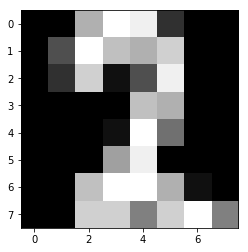

In [8]:
plt.figure(figsize=(20,4))
plt.imshow(np.reshape(x_test[0], (8,8)), cmap=plt.cm.gray)
mlp.predict(x_test[0].reshape(1,-1))

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

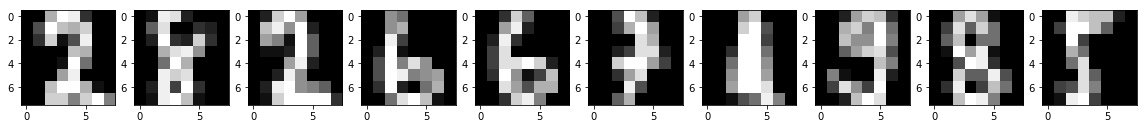

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index,image in enumerate(x_test[0:10]):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
mlp.predict(x_test[0:10])

In [10]:
predictions = mlp.predict(x_test)

In [11]:
score = mlp.score(x_test, y_test)
print(score)

0.9685185185185186


# MLP : Regression

In [18]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [19]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

In [20]:
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [21]:
from sklearn.neural_network import MLPRegressor
clf=MLPRegressor(
    hidden_layer_sizes=(550,450,250),  activation='relu', max_iter=1000, shuffle=True,
    verbose=False, solver = 'sgd')

In [22]:
y_poly = clf.fit(X, y).predict(X)

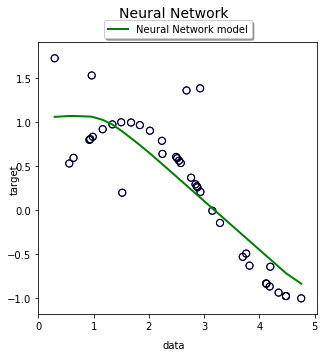

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.plot(X, y_poly, color='g', lw=2,
                  label='{} model'.format('Neural Network'))
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
axes.scatter(X, y, facecolor="none",
                     edgecolor='b', s=50,
                     label='{} support vectors'.format('X'))
axes.scatter(X,y,facecolor="none", edgecolor="k", s=50,label='other training data')
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Neural Network", fontsize=14)
plt.show()